# FIA-MS data processing and visualization

### This example notebook presents the use of the custom FIA-MS tools after data pre-processing using SmartPeak

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import BFAIR.FIA_MS as fia_ms

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


### Define the location of the example files

In [2]:
current_dir = %pwd

In [3]:
feature_dir_example = (current_dir + "/data/FIA_MS_example/features_AdditionalAdducts_example")

In [4]:
sequence_triplicates_example = pd.read_csv(current_dir + "/data/FIA_MS_example/sequence_EColi_example.csv", sep=";")

In [5]:
sample_names_triplicates_example = sequence_triplicates_example["sample_group_name"].unique()

In [6]:
database_triplicates_example = pd.read_csv(current_dir + "/data/FIA_MS_example/CHEMISTRY/iJO1366_struct.tsv", sep="\t", header=None)

### Run the custom FIA-MS data processing functions
You will
- Extract all the relevant information from the provided .featureXML files
- Calculate basic statistics

In [7]:
intensities_triplicates_example = fia_ms.extractNamesAndIntensities(feature_dir_example, sample_names_triplicates_example, database_triplicates_example)

In [8]:
stats_triplicates_example = fia_ms.calculateMeanVarRSD(intensities_triplicates_example, sequence_triplicates_example.drop_duplicates(["sample_group_name", "replicate_group_name"]), min_reps=3)

Have  quick look at what you extracted. The 'intensities_triplicates_example' should include all replicates of each sample

In [9]:
intensities_triplicates_example

,sample_group_name,Metabolite,Formula,Intensity,MZ_value
0,StressTest1_P1Ecoli_10xDil_1,10fthf_c,C20H23N7O7,5621.594727,672.075012
1,StressTest1_P1Ecoli_10xDil_1,12dgr120_c,C27H52O5,43496.585938,741.813110
2,StressTest1_P1Ecoli_10xDil_1,12dgr140_c,C31H60O5,11121.828125,946.303345
3,StressTest1_P1Ecoli_10xDil_1,12dgr141_c,C31H56O5,6038.054688,760.343445
4,StressTest1_P1Ecoli_10xDil_1,12dgr160_c,C35H68O5,1283.704712,604.576172
...,...,...,...,...,...
12441,StressTest6_P1Ecoli_10xDil_3,xdp_c,C10H14N4O12P2,11845.142578,921.828674
12442,StressTest6_P1Ecoli_10xDil_3,xmp_c,C10H13N4O9P1,96053.164062,313.679993
12443,StressTest6_P1Ecoli_10xDil_3,xtp_c,C10H15N4O15P3,112053.515625,909.136230
12444,StressTest6_P1Ecoli_10xDil_3,xtsn_c,C10H12N4O6,26376.486328,282.061523


The summary statistics are reduced to one set per sample. Each of these sets is displayed here as one value per metabolite

In [10]:
stats_triplicates_example

,replicate_group_name,Metabolite,Formula,Mean,Variance,RSD
0,StressTest1_P1Ecoli_10xDil,10fthf_c,C20H23N7O7,440600.703288,3.780837e+11,1.395561
1,StressTest1_P1Ecoli_10xDil,12dgr120_c,C27H52O5,21684.283122,2.979930e+08,0.796082
2,StressTest1_P1Ecoli_10xDil,12dgr140_c,C31H60O5,14263.744141,5.160214e+06,0.159258
3,StressTest1_P1Ecoli_10xDil,12dgr141_c,C31H56O5,21550.184896,1.235015e+08,0.515686
4,StressTest1_P1Ecoli_10xDil,12dgr160_c,C35H68O5,5445.853719,1.055232e+07,0.596497
...,...,...,...,...,...,...
3827,StressTest6_P1Ecoli_10xDil,xdp_c,C10H14N4O12P2,49623.711589,7.158530e+08,0.539166
3828,StressTest6_P1Ecoli_10xDil,xmp_c,C10H13N4O9P1,53341.607747,1.492658e+09,0.724293
3829,StressTest6_P1Ecoli_10xDil,xtp_c,C10H15N4O15P3,45543.629557,2.248106e+09,1.041072
3830,StressTest6_P1Ecoli_10xDil,xtsn_c,C10H12N4O6,103514.869141,6.972373e+09,0.806655


### Visualize the data

After importing and processing the data, we can visulaize it. A good place to start is to have a look at the distributions of its mean values and the corresponding relative standard deviations.

#### Mean

Text(0.5, 1.0, 'Mean')

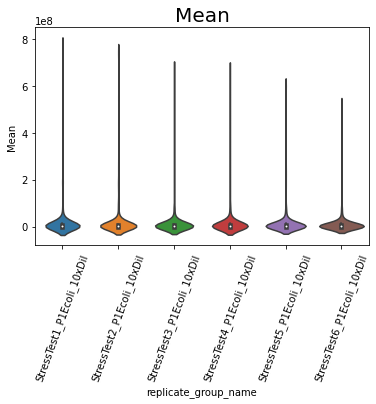

In [11]:
sns.violinplot(x="replicate_group_name", y="Mean", data=stats_triplicates_example, orient = 'v')
plt.xticks(rotation=70)
plt.title('Mean', size = 20)

#### RSD

Text(0.5, 1.0, 'RSD')

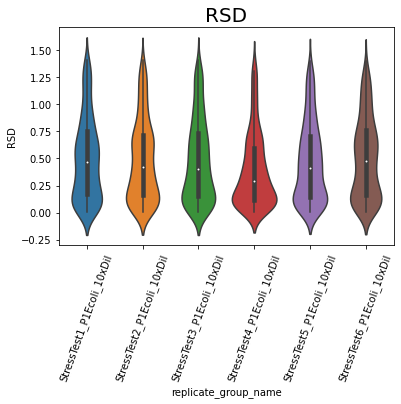

In [12]:
sns.violinplot(x="replicate_group_name", y="RSD", data=stats_triplicates_example, orient = 'v')
plt.xticks(rotation=70)
plt.title('RSD', size = 20)

### Separate the data
#### You can also separate the data based on for example the 'replicate_group_name' in order to visualize certain parts of it
Split the data by 'replicate_group_name'. Here we do that only for the first sample in the dataset

In [13]:
samples = list(stats_triplicates_example['replicate_group_name'].unique())
samples

['StressTest1_P1Ecoli_10xDil',
 'StressTest2_P1Ecoli_10xDil',
 'StressTest3_P1Ecoli_10xDil',
 'StressTest4_P1Ecoli_10xDil',
 'StressTest5_P1Ecoli_10xDil',
 'StressTest6_P1Ecoli_10xDil']

In [14]:
StressTest1_P1Ecoli_10xDil = stats_triplicates_example[stats_triplicates_example['replicate_group_name'] == samples[0]]

(array([0]), [Text(0, 0, 'StressTest1_P1Ecoli_10xDil')])

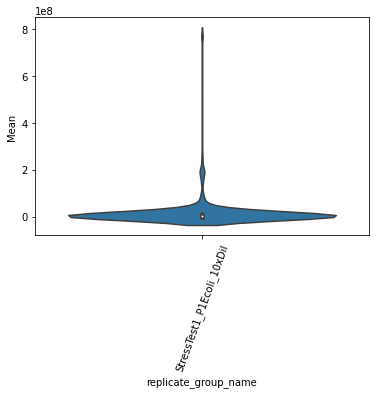

In [15]:
sns.violinplot(x="replicate_group_name", y="Mean", data=StressTest1_P1Ecoli_10xDil, orient = 'v')
plt.xticks(rotation=70)

(array([0]), [Text(0, 0, 'StressTest1_P1Ecoli_10xDil')])

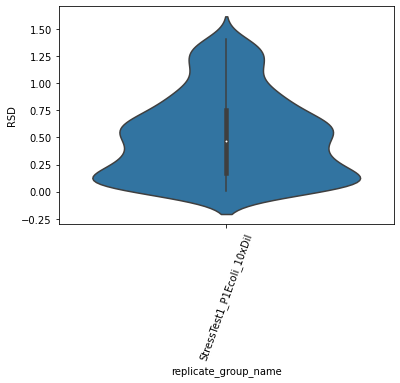

In [16]:
sns.violinplot(x="replicate_group_name", y="RSD", data=StressTest1_P1Ecoli_10xDil, orient = 'v')
plt.xticks(rotation=70)

### Transform the datafrrame for further analysis

In [17]:
df_t = fia_ms.transform_dataframe(stats_triplicates_example, group_name="replicate_group_name", value_name="Mean")

In [18]:
df_t

,nad_c,cpppg3_c,3ohcoa_c,2agpe120_c,bwco_c,2agpg160_c,feenter_c,glx_c,mso3_c,gar_c,...,6pgc_c,ca2_c,crn__D_c,alltt_c,uamag_c,amet_c,glyb_c,glyc_c,tdcoa_c,aact_c
StressTest1_P1Ecoli_10xDil,4.81144e+06,60358.8,15251.5,15261.1,9353.84,NaN,5636.65,1.73648e+08,2.87358e+07,1.29805e+06,...,325609,524448,2.85359e+07,28380.7,10873.4,1.7454e+07,3.80738e+07,2.97718e+07,17608.6,6.80622e+06
StressTest2_P1Ecoli_10xDil,5.00237e+06,72594.1,22093.2,29729.3,NaN,8765.47,6076.57,1.84328e+08,2.47464e+07,1.31959e+06,...,306947,529904,2.90508e+07,32992.3,24144.5,1.61145e+07,3.59641e+07,2.2719e+07,91897,6.55681e+06
StressTest3_P1Ecoli_10xDil,4.93883e+06,73366.2,12035.5,49085.6,12326.5,6415.1,6133.65,2.00137e+08,2.48651e+07,1.374e+06,...,309887,517719,3.01916e+07,33794.6,18957.6,1.66016e+07,3.60699e+07,2.31215e+07,19229.9,6.57512e+06
StressTest4_P1Ecoli_10xDil,7.18887e+06,122555,20382.9,46875.8,15774.2,1538.13,NaN,2.05023e+08,2.9014e+07,4.84689e+06,...,310660,243388,2.78515e+07,46101.8,22081.3,1.90966e+07,3.45695e+07,1.99299e+07,18009.3,5.46561e+06
StressTest5_P1Ecoli_10xDil,4.91094e+06,58578.4,14959.8,17266.7,8831.86,38840.4,NaN,2.18911e+08,2.74309e+07,1.3203e+06,...,295518,456051,3.06927e+07,27081.2,9161.9,1.65322e+07,3.5971e+07,2.17865e+07,69673.3,6.41457e+06
StressTest6_P1Ecoli_10xDil,3.31258e+06,83849.1,14040.4,13382.9,33074.9,2633.24,NaN,2.5891e+08,3.02139e+07,1.21919e+06,...,294554,456170,2.92949e+07,146758,7977.54,1.63024e+07,3.73821e+07,2.08953e+07,46304.9,5.98957e+06


In [23]:
from sklearn.preprocessing import StandardScaler
df_t = df_t.dropna(axis='columns')
features = list(df_t.columns)
# Separating out the features
x = df_t.loc[:, features].values
# Separating out the target
y = list(df_t.index)
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
principalDf

,principal component 1,principal component 2
0,5.924626,41.127028
1,-2.417156,20.958617
2,-5.111053,7.147834
3,55.792172,-27.621352
4,-16.658172,-8.486594
5,-37.530418,-33.125532


In [31]:
finalDf = pd.concat([principalDf, pd.Series(y, name='sample')], axis = 1)

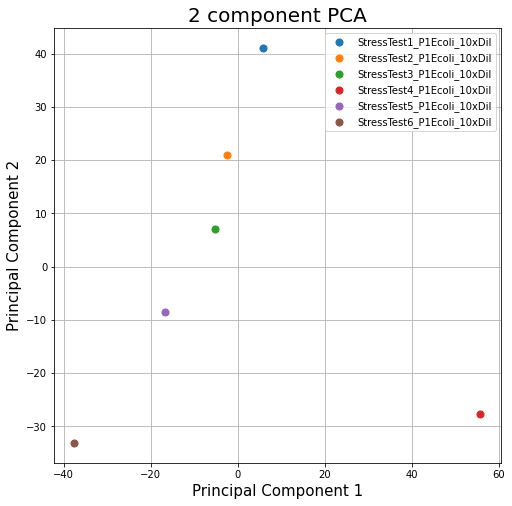

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = y
for target in targets:
    indicesToKeep = finalDf['sample'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50,
              cmap = 'Pastel1')
ax.legend(targets)
ax.grid()